### Project 1

In [25]:
import pandas as pd

import matplotlib.pyplot as plt

df = pd.read_csv('http://128.198.162.191/pydev/dataFiles/VIDEO-GAMES/Video_Games.csv')

df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


### 1. What is the top videogame by units?

In [26]:
# Print only the required columns

reqColumns = df[['Name', 'Global_Sales']]

# Sort by sales greatest to least

gameSort = reqColumns.sort_values(by = ['Global_Sales'], ascending = False)

# Show top result

gameSort.head(1)

,Name,Global_Sales
0,Wii Sports,82.53


### 2. What is the top video game by the number of users?

In [31]:
# Print only the required columns

reqColumnsUser = df[['Name', 'User_Count']]

# Sort user count greatest to least

userSort = reqColumnsUser.sort_values(by = ['User_Count'], ascending = False)

# Show top result

userSort.head(1)

,Name,User_Count
2851,The Witcher 3: Wild Hunt,10665.0


### 3. What are the 10 most successful games in North America by units?

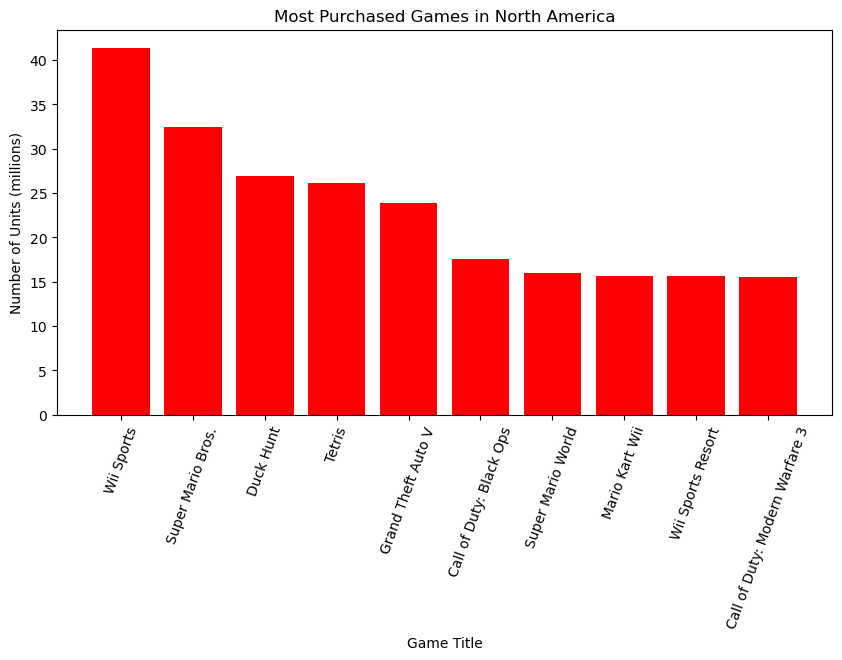

In [38]:
# Sort data, filter top 10 results, and sum numbers in identical columns

northAmericaSales = df.groupby('Name')['NA_Sales'].sum().sort_values(ascending = False).head(10)

# Format the chart

plt.figure(figsize = (10, 5))

# Format the chart (bar), we need to pass the 'X' and 'Y' information and labels

plt.bar(northAmericaSales.index, northAmericaSales.values, color = 'red')

plt.xticks(rotation = 70)

plt.title("Most Purchased Games in North America")

plt.xlabel("Game Title")

plt.ylabel("Number of Units (millions)")


# Display the visualization

plt.show()

### 4. Show the 10 most successful games in North America by units for games released after 2010.


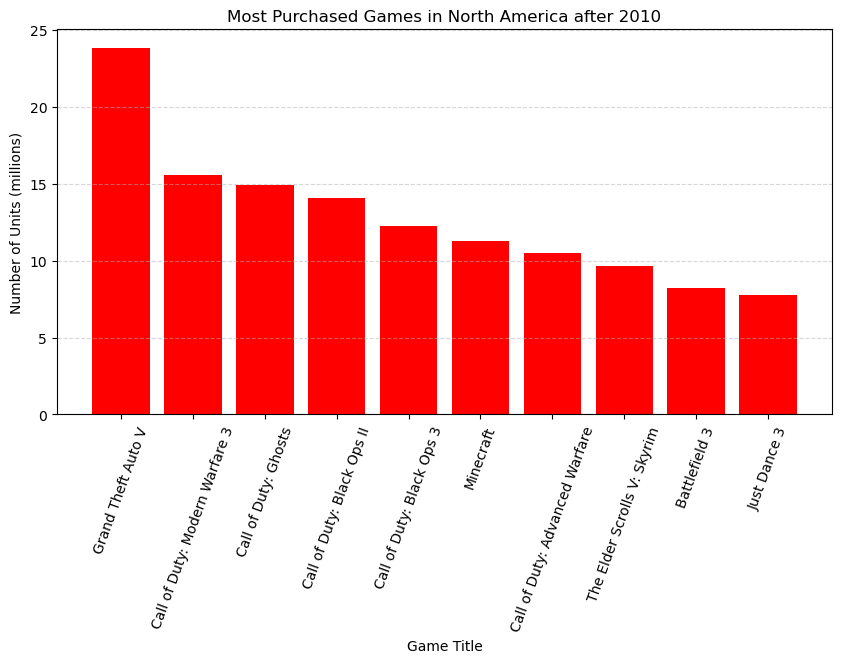

In [41]:
# Filter to show only games released after 2010

gameYear = df[df['Year_of_Release'] > 2010]

# Sort data, filter top 10 results, and sum numbers in identical columns

northAmericaSales = gameYear.groupby('Name')['NA_Sales'].sum().sort_values(ascending = False).head(10)

# Format the chart

plt.figure(figsize = (10, 5))

# Format the chart (bar), we need to pass the 'X' and 'Y' information and labels

plt.bar(northAmericaSales.index, northAmericaSales.values, color = 'red')

# plt.bar(northAmericaSales.index, northAmericaSales.values, color = 'red')

plt.xticks(rotation = 70)

plt.title("Most Purchased Games in North America after 2010")

plt.xlabel("Game Title")

plt.ylabel("Number of Units (millions)")

plt.grid(axis='y', linestyle='--', alpha = .5)

# Display the visualization

plt.show()

### What is the total units for all games over the years represented in the data?

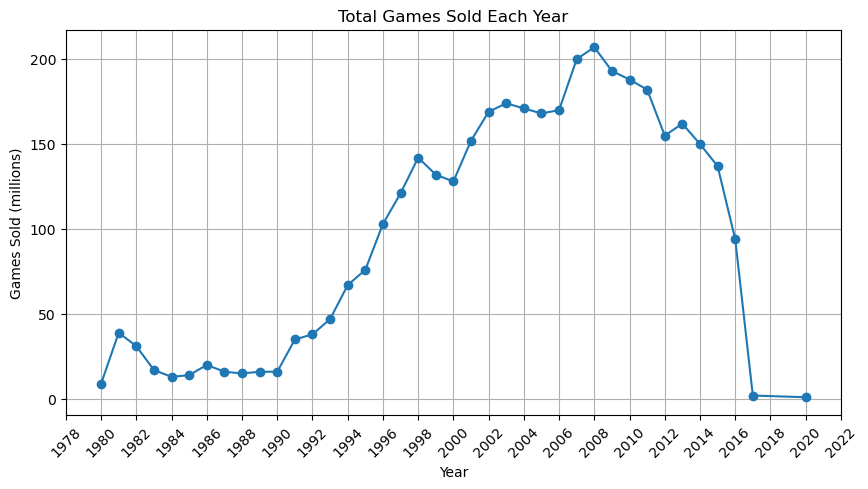

In [42]:
# Convert the year column to numeric, coerce errors to Null

df['Year_of_Release'] = pd.to_numeric(df['Year_of_Release'])

# Drop rows where YEAR is NaN (this is the unique id rows)

df_clean = df.dropna(subset = ['Year_of_Release'])

# Convert year to an integer using .loc
# The [:, 'YEAR'] instructs Pandas to select all rows in the 'YEAR' column

df_clean.loc[:, 'Year_of_Release'] = df_clean['Year_of_Release'].astype(int)

# Now group the cleansed data

gameSoldByYear = df_clean.groupby('Year_of_Release')['Global_Sales'].nunique()

# Visualize

plt.figure(figsize = (10,5))
plt.plot(gameSoldByYear.index, gameSoldByYear.values, marker = 'o')

plt.xlabel('Year')
plt.ylabel('Games Sold (millions)')
plt.title('Total Games Sold Each Year')


# Controls interval of the X axis values
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(2))
plt.xticks(rotation = 45)
plt.grid(True)

plt.show()